数据预览:
             name                                               logo  \
0       PyTorch3D  logos/88318438fc9c2bbc4989daf11182ed9ec9e685c4...   
1          Captum  logos/2abc1fc7558376c329b2798f7bcde761b3644e88...   
2  Albumentations  logos/9c283e8d47d4c3f87139e047313bbb92c6f038a2...   
3        Anomalib  logos/79211c70ad6c0b096a678d6642e449e908438c6b...   
4           docTR  logos/a5efec22de5026d7c71d2362aeb47644c441dbba...   

   category               subcategory  2025_value  
0  Modeling                        3D       71.86  
1  Modeling  Adversarial & Robustness       90.99  
2  Modeling           Computer Vision      120.87  
3  Modeling           Computer Vision      209.13  
4  Modeling           Computer Vision      105.85  

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         61 non-null     object 
 1   logo     

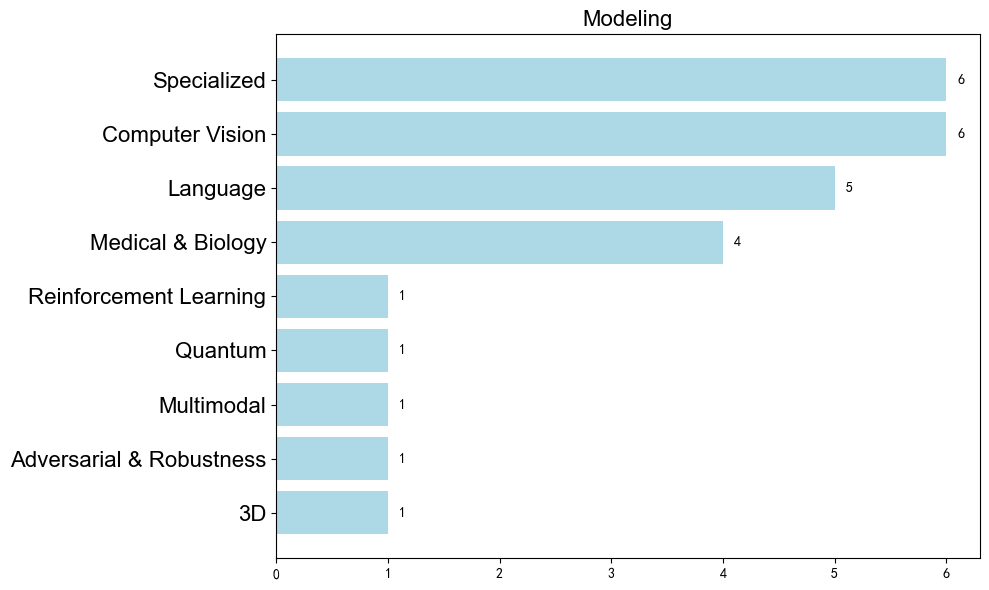

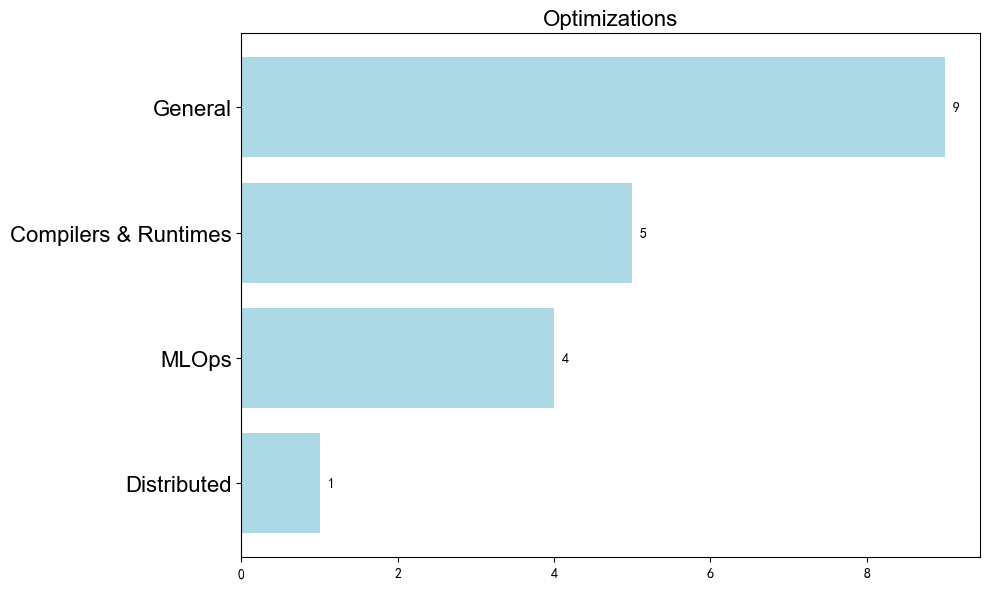

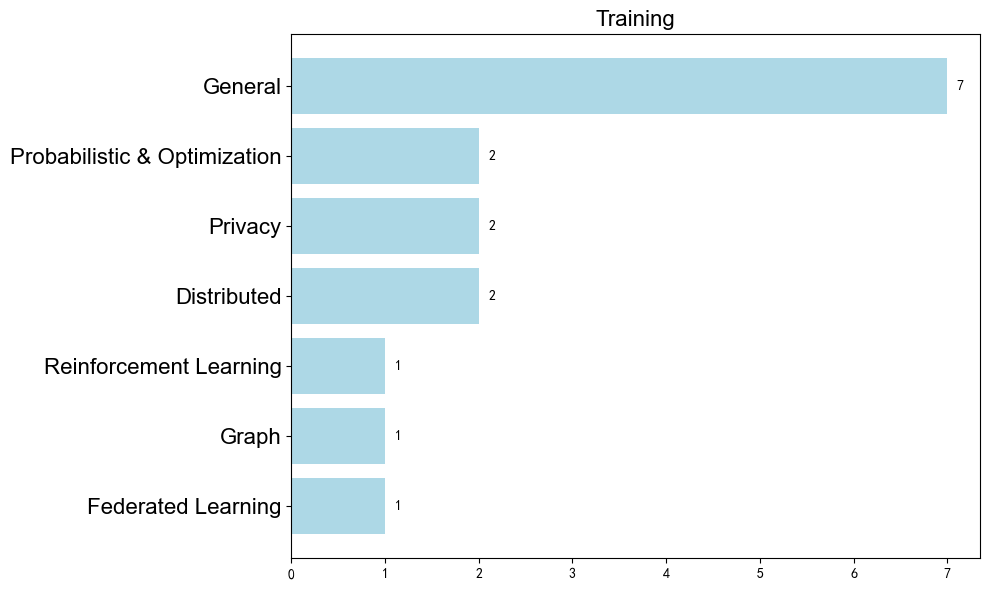

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('filtered_data_2修改基金会项目.csv')

# 检查数据
print("数据预览:")
print(df.head())
print("\n数据信息:")
print(df.info())

# 统计每个category下各subcategory的数量
category_stats = df.groupby(['category', 'subcategory']).size().reset_index(name='counts')

# 获取所有唯一的category
categories = category_stats['category'].unique()

print("\n统计结果:")
print(category_stats)
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 为每个category创建横向条形图
for category in categories:
    # 筛选当前category的数据
    category_data = category_stats[category_stats['category'] == category].sort_values('counts', ascending=True)
    
    # 创建图形
    plt.figure(figsize=(10, 6))
    
    # 创建横向条形图
    bars = plt.barh(category_data['subcategory'], category_data['counts'], color='lightblue')
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', 
                 va='center')
    
    # 设置图表标题和标签
    plt.title( category, fontsize=16,fontname='Arial')
    # 调整 y 轴刻度标签（柱子左侧文字）的字号和字体
    plt.yticks(
        fontsize=16,       # 字号（默认通常为 10-12）
        fontname='Arial'  # 字体（需系统支持，如 'Arial', 'SimHei' 等）
    )
    
    # 调整布局防止标签被截断
    plt.tight_layout()
    
    # 显示图表
    plt.show()